In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#df = pd.read_csv("zika_weather_clean.csv")
#df.head()

,report_date,location,lat,long,dewPt_max,dewPt_mean,dewPt_min,precip_total_max,precip_total_mean,precip_total_min,pressure_max,pressure_mean,pressure_min,temp_max,temp_mean,temp_min,wspd_max,wspd_mean,wspd_min
0,1/9/16,"Colombia-Bogota-Bogota, _D.C.",4.710989,-74.072092,98,10.54464286,5,None,None,None,754.51,752.4095946,745.33,98,15.34821429,6,33,10.60909091,4
1,1/16/16,"Colombia-Bogota-Bogota, _D.C.",4.710989,-74.072092,13,8.688888889,2,None,None,None,754.51,752.3409375,750.05,23,13.63111111,2,28,9.769953052,4
2,1/23/16,"Colombia-Bogota-Bogota, _D.C.",4.710989,-74.072092,13,8.641666667,-1,None,None,None,754.76,752.5614644,750.05,23,13.625,2,30,9.164502165,4
3,2/6/16,"Colombia-Bogota-Bogota, _D.C.",4.710989,-74.072092,13,8.530701754,-6,None,None,None,754.26,752.2243612,749.8,24,14.17982456,4,31,10.1146789,4
4,6/13/16,Argentina-San_Juan,-31.535107,-68.538594,4,-0.365384615,-4,None,None,None,964.4,953.6888889,947,17,6.555555556,-3,33,11.64705882,4


In [ ]:
#df.info()

In [4]:
df = pd.read_csv("data_for_modelling.csv")

In [5]:
df.head()

,dewPt_max,dewPt_mean,dewPt_min,precip_total_max,precip_total_mean,precip_total_min,pressure_max,pressure_mean,pressure_min,temp_max,temp_mean,temp_min,wspd_max,wspd_mean,wspd_min,zika_confirmed
0,9.649325,-1.454919,-1.401169,6.270825e-16,1.175847e-15,9.924592e-16,-1.177345,-1.494531,-1.403926,8.789665,-1.490906,-1.804205,0.106652,-0.181011,-0.568948,0
1,-1.108508,-1.811340,-1.855505,6.270825e-16,1.175847e-15,9.924592e-16,-1.177345,-1.495253,-1.356565,-1.034095,-1.793407,-2.427326,-0.047103,-0.414935,-0.568948,0
2,-1.108508,-1.820409,-2.309840,6.270825e-16,1.175847e-15,9.924592e-16,-1.175393,-1.492933,-1.356565,-1.034095,-1.794484,-2.427326,0.014399,-0.583715,-0.568948,0
3,-1.108508,-1.841721,-3.067066,6.270825e-16,1.175847e-15,9.924592e-16,-1.179296,-1.496479,-1.359074,-0.903111,-1.696741,-2.115765,0.045150,-0.318837,-0.568948,0
4,-2.247573,-3.550325,-2.764176,6.270825e-16,1.175847e-15,9.924592e-16,0.461100,0.622834,0.619641,-1.819995,-3.039905,-3.206228,0.106652,0.108341,-0.568948,0


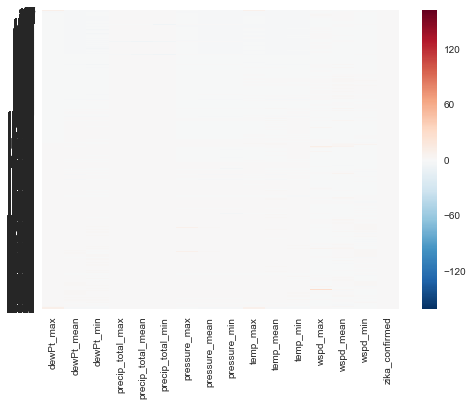

In [101]:
import seaborn as sns
ax = sns.heatmap(data_modelling)

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [73]:
X = df.drop(['zika_confirmed'], axis=1).values
y = df["zika_confirmed"].values.ravel()

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [74]:
y_train = y_train.reshape(y_train.shape[0], 1)

In [92]:
print(X_train.shape)
#y_test.shape
print(y_train.shape)
y_test.shape
y_test = y_test.reshape(y_test.shape[0], 1)
import warnings
warnings.filterwarnings('ignore')

(20186, 15)
(20186, 1)


In [93]:
from sklearn.model_selection import cross_val_score
logReg_model = logReg.fit(X_train, y_train)
y_pred = logReg_model.predict(X_test)
accuracy = logReg_model.score(X_test, y_test)
accuracy

0.67845584835876094

In [94]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.52199736708497968

In [95]:
X_test[0] 

array([ -4.75694544e-01,  -4.64399713e-01,  -3.41052734e-01,
         6.27082524e-16,   1.17584664e-15,   9.92459214e-16,
         1.57965176e+00,  -4.28510933e-01,  -3.83061571e-01,
         1.44756599e-01,   1.94199605e-01,   6.51599614e-02,
         2.29655793e-01,   8.84349299e-01,  -5.68948247e-01])

In [96]:
test_Weather = np.array([-4.75694544e-01,  -4.64399713e-01,  -3.41052734e-01,
         6.27082524e-16,   1.17584664e-15,   9.92459214e-16,
         1.57965176e+00,  -4.28510933e-01,  -3.83061571e-01,
         1.44756599e-01,   1.94199605e-01,   6.51599614e-02,
         2.29655793e-01,   8.84349299e-01,  -5.68948247e-01])

In [100]:
zika_prob = logReg_model.predict_proba(test_Weather)
zika_prob

array([[ 0.68029532,  0.31970468]])